<a href="https://colab.research.google.com/github/Pillalamarrivyshnavi/Ml-Models/blob/main/Linear_Regression_case_Study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#scores-dependent and hours-independent
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Employee_StudyHours.csv")


In [13]:
df.head(10)

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0
5,1.5,20.0
6,9.2,88.0
7,5.5,60.0
8,8.3,81.0
9,2.7,25.0


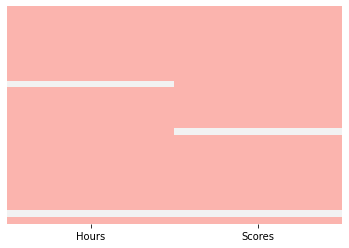

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Pastel1')
  return plt.show()#gist_rainbow
get_heatmap(df)

In [18]:
median_hrs=df['Hours'].median()
print(median_hrs)

4.65


In [20]:
import math as mt
mean_scr=df['Scores'].mean()
print(mt.floor(mean_scr))

51


In [21]:
df['Hours']=df['Hours'].fillna(median_hrs)
df['Scores']=df['Scores'].fillna(mean_scr)

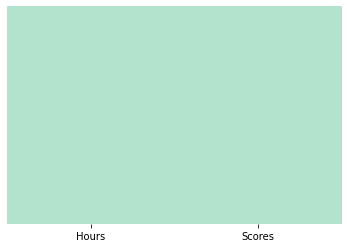

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Pastel2')
  return plt.show()#gist_rainbow
get_heatmap(df)

In [23]:
df.head()

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [24]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,1:].values

In [ ]:
import numpy as np
train_x=df[['Hours']]

In [26]:
train_x

,Hours
0,2.50
1,5.10
2,3.20
3,8.50
4,3.50
5,1.50
6,9.20
7,5.50
8,8.30
9,2.70


In [27]:
Y

array([[21.        ],
       [47.        ],
       [27.        ],
       [75.        ],
       [30.        ],
       [20.        ],
       [88.        ],
       [60.        ],
       [81.        ],
       [25.        ],
       [85.        ],
       [85.        ],
       [62.        ],
       [41.        ],
       [42.        ],
       [17.        ],
       [95.        ],
       [30.        ],
       [51.46666667],
       [24.        ],
       [67.        ],
       [69.        ],
       [30.        ],
       [54.        ],
       [35.        ],
       [76.        ],
       [86.        ],
       [19.        ],
       [30.        ],
       [63.        ],
       [51.46666667],
       [60.        ]])

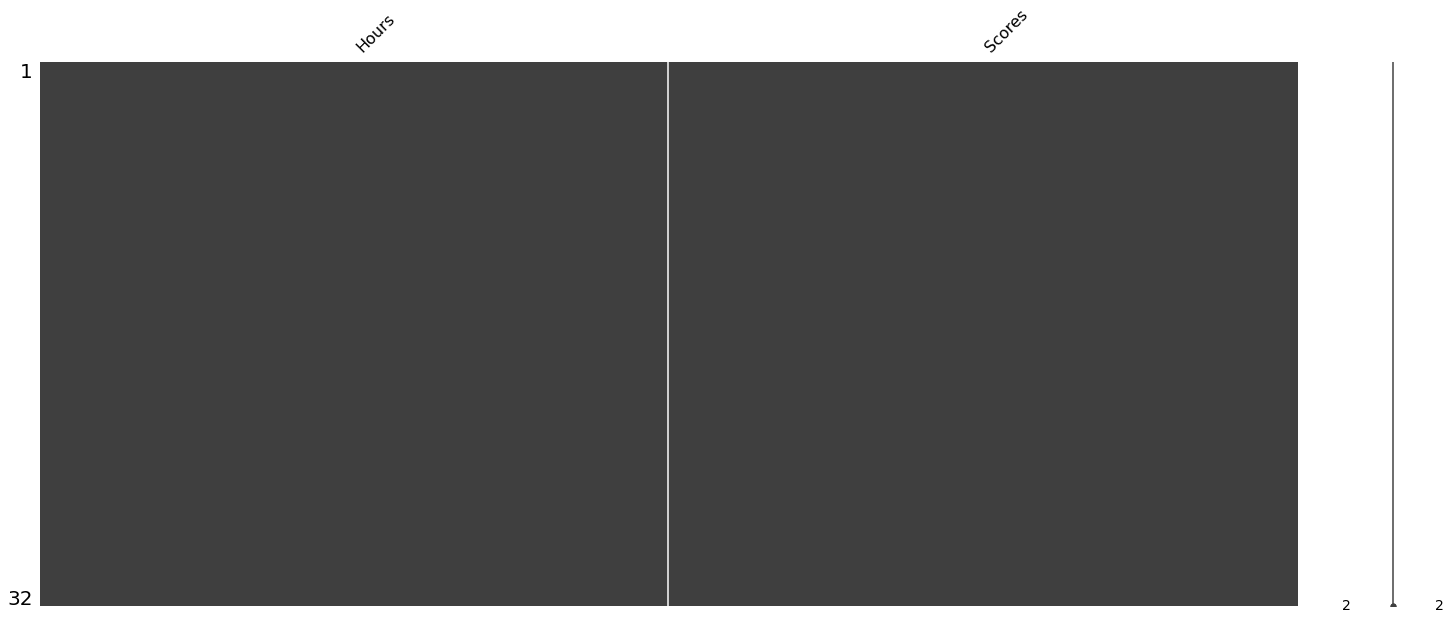

In [29]:
import missingno as msno
msno.matrix(df)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [31]:
X_train

array([[3.8 ],
       [1.5 ],
       [2.5 ],
       [8.3 ],
       [4.65],
       [6.9 ],
       [4.8 ],
       [5.1 ],
       [5.6 ],
       [9.2 ],
       [3.5 ],
       [3.4 ],
       [6.1 ],
       [1.9 ],
       [2.7 ],
       [5.5 ],
       [1.3 ],
       [8.5 ],
       [2.5 ],
       [7.4 ],
       [1.1 ],
       [5.9 ]])

In [32]:
Y_train

array([[35.        ],
       [20.        ],
       [30.        ],
       [81.        ],
       [51.46666667],
       [76.        ],
       [54.        ],
       [47.        ],
       [60.        ],
       [88.        ],
       [30.        ],
       [51.46666667],
       [63.        ],
       [24.        ],
       [25.        ],
       [60.        ],
       [19.        ],
       [75.        ],
       [21.        ],
       [69.        ],
       [17.        ],
       [62.        ]])

In [33]:
X_test

array([[4.65],
       [2.7 ],
       [7.7 ],
       [3.2 ],
       [8.9 ],
       [3.3 ],
       [2.6 ],
       [7.8 ],
       [6.1 ],
       [4.5 ]])

In [34]:
Y_test

array([[85.],
       [30.],
       [85.],
       [27.],
       [95.],
       [42.],
       [30.],
       [86.],
       [67.],
       [41.]])

In [35]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [36]:
model.fit(X_train,Y_train)

LinearRegression()

In [46]:
y_pred_test=model.predict(X_test)
y_pred_train=model.predict(X_train)

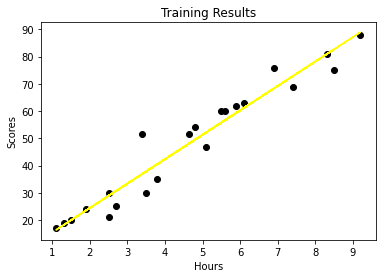

In [44]:
import matplotlib.pyplot as plt
#visualizing the test results
plt.scatter(X_train,Y_train,color='black')
plt.plot(X_train,y_pred_train,color='yellow')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Training Results')
plt.show()

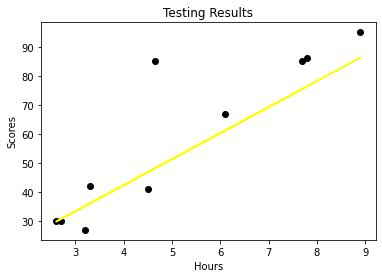

In [47]:
import matplotlib.pyplot as plt
#visualizing the test results
plt.scatter(X_test,Y_test,color='black')
plt.plot(X_test,y_pred_test,color='yellow')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Testing Results')
plt.show()

In [50]:
accuracy_test=model.score(X_test,Y_test)
print("Test accuracy is:",accuracy_test)

Test accuracy is: 0.7360334276039892


In [51]:
accuracy_train=model.score(X_train,Y_train)
print("Training accuracy is:",accuracy_train)

Training accuracy is: 0.940796501348013


In [52]:
print(model.score(X,Y)*100)

86.725618678654


In [53]:
import math as m
Hours=float(input("Enter Hours of an Employee:"))
y_Res=model.predict([[Hours]])
print(" Score estimated by Model:",m.floor(y_Res))

Enter Hours of an Employee:4
 Score estimated by Model: 42
